In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import r2_score #评价回归预测模型的性能

%matplotlib inline


In [2]:

dpath='./data/'
data=pd.read_csv(dpath+"Ames_House_train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()#区别于data.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [5]:
#各个属性的统计特性

data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


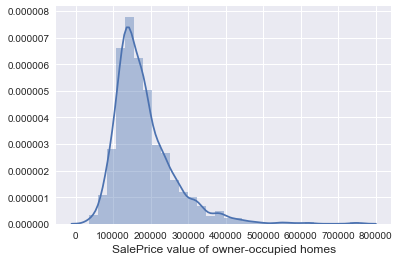

(1460, 81)


In [6]:
# 目标y（房屋价格）的直方图／分布
fig = plt.figure()
#fig.set_size_inches(7,7)#设置物理尺寸
sns.distplot(data.SalePrice.values , bins=30, kde=True)# kde True/False 密度曲线  ,rug 边际毛毯  
plt.xlabel('SalePrice value of owner-occupied homes', fontsize=12)
plt.show()
print data.shape

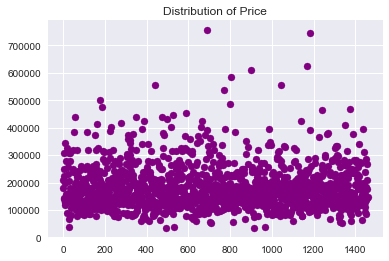

In [7]:
# 单个特征的散点图
plt.scatter(range(data.shape[0]),data["SalePrice"].values,color='purple')
plt.title("Distribution of Price");

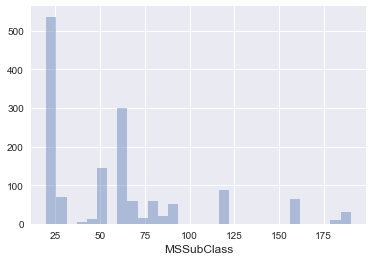

In [8]:
#举例，第一个特征MSSubClass
fig01=plt.figure()
sns.distplot(data.MSSubClass.values,bins=30,kde=False)
plt.xlabel('MSSubClass',fontsize=12)#房地产建筑类别
plt.show()
#

In [9]:
NA_num=data.isnull().sum().sort_values(ascending=False)
NA_ratio=NA_num/len(data)
print NA_num

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [10]:
NA_data=pd.concat([NA_num,NA_ratio],axis=1,keys=['count','ratio'])
NA_data.head(20)#

,count,ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [11]:
data = data.drop(NA_data[NA_data['count']>1].index, axis=1)
data.shape

(1460, 63)

In [12]:
data=data.drop(data.loc[data['Electrical'].isnull()].index) 
data.shape

(1459, 63)

(1450, 63)


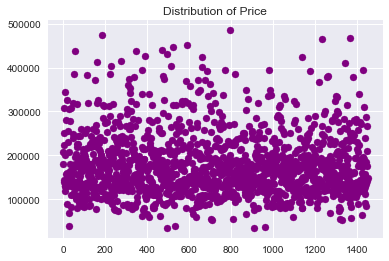

In [13]:
data=data[data.SalePrice<500000]
print data.shape
plt.scatter(range(data.shape[0]),data["SalePrice"].values,color='purple')
plt.title("Distribution of Price");

In [14]:
#提取非数字
data = data.loc[:,data.columns[data.dtypes != 'object']]
data.info
data.shape

(1450, 35)

In [15]:
#两两特征之间的相关性
cols=data.columns#得到所有列的名字
data_corr=data.corr().abs()#通常认为相关系数大于0.5的为强相关

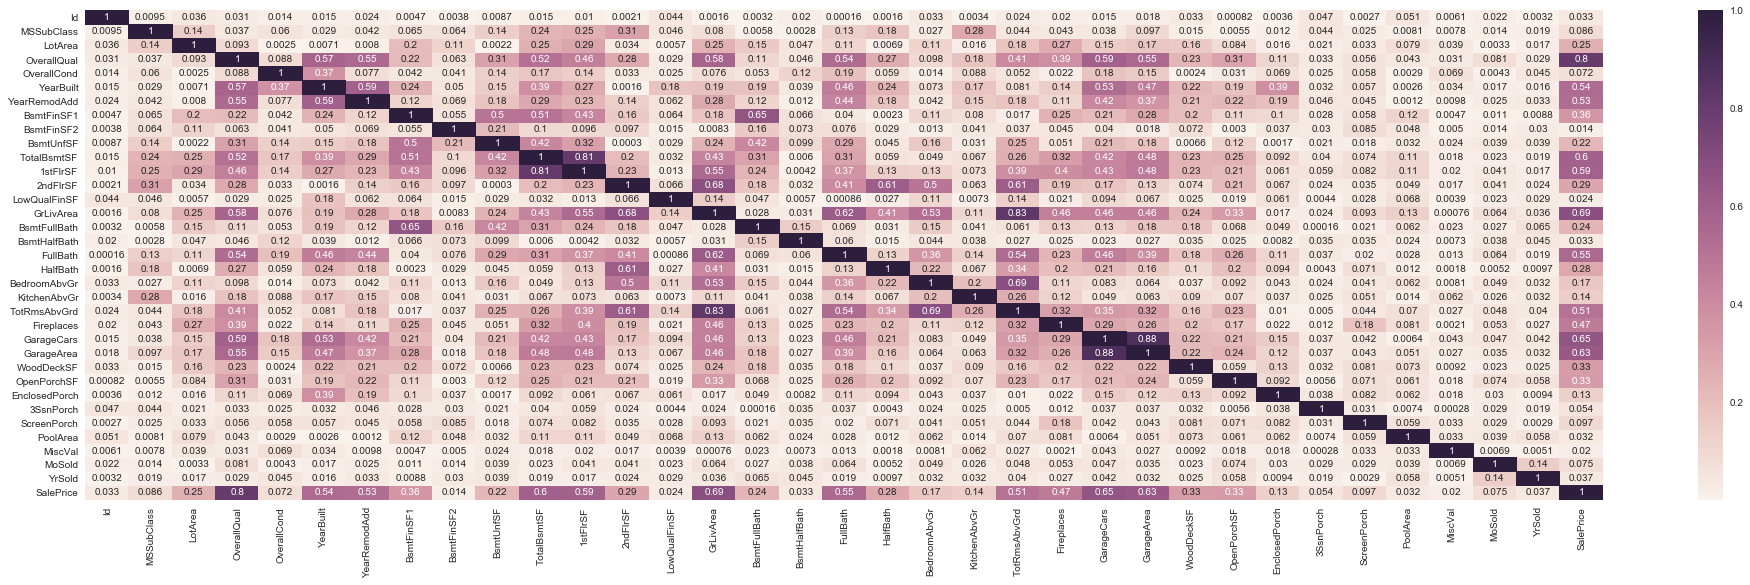

In [16]:
plt.subplots(figsize=(34, 9))
sns.heatmap(data_corr,annot=True)

sns.heatmap(data_corr,mask=data_corr<1,cbar=False)
plt.savefig('corr.png')
plt.show()

In [17]:
#选择高相关度的
threshold=0.5#经验值？
#相关度高的特征对，阈值0.5以上
corr_list=[]
pSize=data.shape[1]#35个特征
SalePrice_corr_list=[]

#搜索相关度高的特征对
for i in range(0,pSize):#先列
    for j in range(i+1,pSize):#该列每行，从上到下
        #import pdb;pdb.set_trace()
        if (data_corr.iloc[i,j]>=threshold and data_corr.iloc[i,j]<1) or (data_corr.iloc[i,j]<=-threshold):
            corr_list.append([data_corr.iloc[i,j],i,j])
               
#相关性按从高到低排列
sort_corr_list=sorted(corr_list,key=lambda x: -abs(x[0]))#sorted结合lambda排序
#打印相关性和列名称
for v,i,j in sort_corr_list:
    print "%s --- %s = %.2f" % (cols[i],cols[j],v)

GarageCars --- GarageArea = 0.88
GrLivArea --- TotRmsAbvGrd = 0.83
TotalBsmtSF --- 1stFlrSF = 0.81
OverallQual --- SalePrice = 0.80
GrLivArea --- SalePrice = 0.69
BedroomAbvGr --- TotRmsAbvGrd = 0.69
2ndFlrSF --- GrLivArea = 0.68
GarageCars --- SalePrice = 0.65
BsmtFinSF1 --- BsmtFullBath = 0.65
GarageArea --- SalePrice = 0.63
GrLivArea --- FullBath = 0.62
2ndFlrSF --- TotRmsAbvGrd = 0.61
2ndFlrSF --- HalfBath = 0.61
TotalBsmtSF --- SalePrice = 0.60
OverallQual --- GarageCars = 0.59
YearBuilt --- YearRemodAdd = 0.59
1stFlrSF --- SalePrice = 0.59
OverallQual --- GrLivArea = 0.58
OverallQual --- YearBuilt = 0.57
FullBath --- SalePrice = 0.55
OverallQual --- GarageArea = 0.55
OverallQual --- YearRemodAdd = 0.55
1stFlrSF --- GrLivArea = 0.55
YearBuilt --- SalePrice = 0.54
FullBath --- TotRmsAbvGrd = 0.54
OverallQual --- FullBath = 0.54
YearBuilt --- GarageCars = 0.53
YearRemodAdd --- SalePrice = 0.53
GrLivArea --- BedroomAbvGr = 0.53
OverallQual --- TotalBsmtSF = 0.52
TotRmsAbvGrd --- Sale

In [18]:
#暂时将所有35类当作输入特征，之后可以试一下只与SalePrice相关度高的数字特征
print data.shape
y=data['SalePrice'].values#价格为输出
x=data.drop('SalePrice',axis=1)#其余为输入

(1450, 35)


In [33]:
from sklearn.cross_validation import train_test_split#交叉验证
#随机采样10%的数据构建测试样本，其余作为训练样本
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.1)
#random_state随机数种子，怎么定？？？？test_size表示比例



In [34]:
#标准化，为了避免原始特征值差异过大，从而导致无法比较个特征的重要性
from sklearn.preprocessing import StandardScaler

#分别初始化->标准化器
ss_x=StandardScaler()
ss_y=StandardScaler()

#分别对训练和测试数据的特征以及目标值进行标准化处理
x_train=ss_x.fit_transform(x_train)#训练特征，不包括标签/输出SalePrince
x_test=ss_x.transform(x_test)#测试特征

y_train=ss_y.fit_transform(y_train.reshape(-1,1))
y_test=ss_y.transform(y_test.reshape(-1,1))


# 确定模型类型


1.默认参数的线性回归

In [35]:
from sklearn.linear_model import LinearRegression
#使用默认配置初始化
lr=LinearRegression()

#训练模型参数
lr.fit(x_train,y_train)

#预测，计算score会自动调用predict
lr_y_predict_train=lr.predict(x_train)
lr_y_predict=lr.predict(x_test)

#显示特征回归系数
lr.coef_

array([[ -9.73660602e-03,  -9.16377121e-02,   5.47967185e-02,
          3.22177722e-01,   7.38456832e-02,   1.59900902e-01,
          5.36283051e-02,   1.04511661e+12,   3.67966022e+11,
          1.02304191e+12,  -1.00757422e+12,  -1.72576785e+12,
         -1.96455874e+12,  -2.24163956e+11,   2.31231200e+12,
          8.76083374e-02,   2.46429443e-03,   2.13317871e-02,
         -3.05175781e-05,  -7.12099671e-02,  -3.38134766e-02,
          9.38720703e-02,   5.06896973e-02,   1.17462158e-01,
          2.57873535e-03,   5.73997498e-02,   1.11999512e-02,
          2.41699219e-02,   1.86767578e-02,   3.51257324e-02,
         -5.17578125e-02,  -4.33349609e-03,   1.87530518e-02,
         -2.02407837e-02]])

In [36]:
#模型评价
#删除了房价40万以上是0.80，删除30万以上样本是0.673，删除50万以上0.862，不删除降为0.795，而且训练集的正确率也下降到0.8，之前是0.82
print '默认设置的线性模型在测试集的正确率是：',lr.score(x_test,y_test)
print '默认设置的线性模型在训练集的正确率是：',lr.score(x_train,y_train)

默认设置的线性模型在测试集的正确率是： 0.861929835611
默认设置的线性模型在训练集的正确率是： 0.821538737256


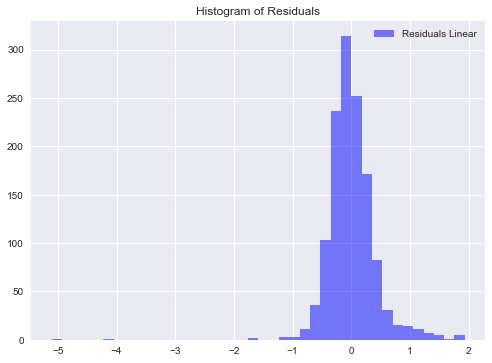

In [37]:
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - lr_y_predict_train,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

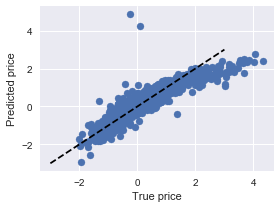

In [38]:
#还可以观察预测值与真值的散点图
plt.figure(figsize=(4, 3))
plt.scatter(y_train, lr_y_predict_train)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

In [39]:
#线性模型，SGD优化模型参数
from sklearn.linear_model import SGDRegressor

#用默认配置初始化线
sgdr=SGDRegressor(n_iter=10000)

#训练：参数估计
sgdr.fit(x_train,y_train)

#预测
#sgdr_y_predict = sgdr.predict(X_test)

sgdr.coef_


array([ -9.43471005e-03,  -9.28847097e-02,   5.67788125e-02,
         3.24430604e-01,   7.43232718e-02,   1.59721574e-01,
         5.38049471e-02,   3.20999771e-02,  -7.64737281e-03,
         9.65064355e-04,   3.14830876e-02,   1.04993279e-01,
         9.56610051e-02,  -3.72863176e-03,   1.59273430e-01,
         8.92322279e-02,   3.56884694e-03,   2.30319358e-02,
         1.10918107e-05,  -6.99947301e-02,  -3.40526788e-02,
         9.44520613e-02,   5.13651682e-02,   1.19844313e-01,
         6.68297625e-04,   5.73077290e-02,   1.07818100e-02,
         2.52989685e-02,   1.88110893e-02,   3.57754622e-02,
        -4.97099176e-02,  -4.02115803e-03,   1.92140512e-02,
        -1.97783036e-02])

In [40]:
# 使用SGDRegressor模型自带的评估模块，并输出评估结果
print '默认设置的线性模型在测试集的正确率是：',sgdr.score(x_test,y_test)
print '默认设置的线性模型在训练集的正确率是：',sgdr.score(x_train,y_train)
#数据少，效果不如线性回归

默认设置的线性模型在测试集的正确率是： 0.86156289036
默认设置的线性模型在训练集的正确率是： 0.821495968124


2.正则化的线性回归  L2回归

In [41]:

from sklearn.linear_model import RidgeCV
alphas=[0.01,0.1,1,10,20,40,80,400,450,500,550,600]#这里可以分得更细
reg=RidgeCV(alphas=alphas,store_cv_values=True)
reg.fit(x_train,y_train)

RidgeCV(alphas=[0.01, 0.1, 1, 10, 20, 40, 80, 400, 450, 500, 550, 600],
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

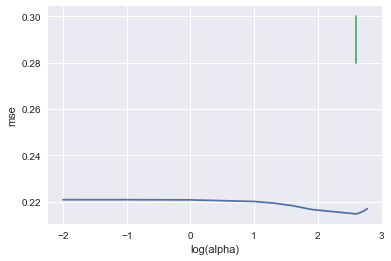

('alpha is:', 400.0)


array([[-0.01026536, -0.05568051,  0.04468047,  0.22754962,  0.04422145,
         0.10400737,  0.08616839,  0.05193723, -0.00294947,  0.01299467,
         0.06598943,  0.0836061 ,  0.06706515, -0.00824635,  0.11857812,
         0.06280881, -0.00363133,  0.05851396,  0.03170364, -0.02996212,
        -0.04728526,  0.08128292,  0.06932825,  0.09339535,  0.06081541,
         0.05447676,  0.0198215 ,  0.01121606,  0.01755765,  0.0263398 ,
        -0.0354677 , -0.00270512,  0.02005719, -0.01382959]])

In [42]:
mse_mean = np.mean(reg.cv_values_, axis = 0)#均值
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) #用log是为了防止平方项造成的残差过大
plt.plot(np.log10(reg.alpha_)*np.ones(3), [0.28, 0.29, 0.30])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', reg.alpha_)
reg.coef_

In [43]:
print 'L2正则的线性模型在测试集的正确率是：',reg.score(x_test,y_test)
print 'L2正则的线性模型在训练集的正确率是：',reg.score(x_train,y_train)

L2正则的线性模型在测试集的正确率是： 0.851458363138
L2正则的线性模型在训练集的正确率是： 0.811482583297


3.L1正则 lasso

In [44]:
from sklearn.linear_model import LassoCV
palphas=[0.03,0.005,0.006,0.01,0.1,1]
lasso=LassoCV(alphas=palphas)
lasso.fit(x_train,y_train)

LassoCV(alphas=[0.03, 0.005, 0.006, 0.01, 0.1, 1], copy_X=True, cv=None,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

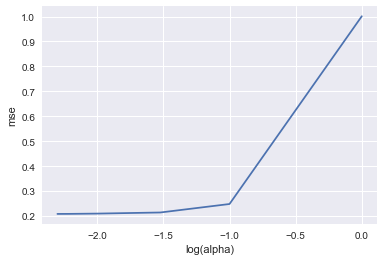

('alpha is:', 0.0050000000000000001)


array([ -4.83126902e-03,  -8.75047635e-02,   5.21119341e-02,
         3.33694447e-01,   6.36058528e-02,   1.45317084e-01,
         6.04205317e-02,   3.71561348e-02,  -3.26494027e-05,
         0.00000000e+00,   3.27692227e-02,   2.10972607e-02,
         0.00000000e+00,  -1.13155994e-02,   2.74338617e-01,
         7.97526608e-02,   0.00000000e+00,   1.61742716e-02,
         0.00000000e+00,  -5.12512637e-02,  -2.85894071e-02,
         7.27541369e-02,   5.23564756e-02,   1.20233697e-01,
         2.64719285e-03,   5.27956724e-02,   8.03203749e-03,
         1.37750104e-02,   1.41196936e-02,   2.78629556e-02,
        -4.52962396e-02,  -0.00000000e+00,   1.47432513e-02,
        -1.47255621e-02])

In [45]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)
lasso.coef_  

In [46]:
print 'L1正则的线性模型在测试集的正确率是：',lasso.score(x_test,y_test)
print 'L1正则的线性模型在训练集的正确率是：',lasso.score(x_train,y_train)

L1正则的线性模型在测试集的正确率是： 0.863226221608
L1正则的线性模型在训练集的正确率是： 0.820843242992
